In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [ ]:
!unzip -uq "/content/drive/MyDrive/fer2013.csv.zip"

In [ ]:
data =pd.read_csv('/content/fer2013.csv')

In [ ]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


Preparing data

In [ ]:
X_train =[]
y_train =[]
X_test =[]
y_test =[]

for index ,row in data.iterrows():
  k = row['pixels'].split(" ")
  if row['Usage']== 'Training':
    X_train.append(np.array(k))
    y_train.append(row['emotion'])

  elif row['Usage']=='PrivateTest':
    X_test.append(np.array(k))
    y_test.append(row['emotion'])

In [ ]:
X_train = np.array(X_train, dtype='uint8')
y_train = np.array(y_train, dtype='uint8')
X_test = np.array(X_test, dtype='uint8')
y_test = np.array(y_test, dtype='uint8')

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train ,num_classes=7)
y_test = to_categorical(y_test ,num_classes=7)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],48,48,1)
X_test = X_test.reshape(X_test.shape[0],48,48,1)

Image augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_generator =ImageDataGenerator(
    rescale =1./255,
    rotation_range =10,
    horizontal_flip = True,
    width_shift_range= 0.1,
    height_shift_range= 0.1,
    fill_mode = 'nearest'
  )

testgen = ImageDataGenerator(rescale =1./255)

In [ ]:
train_flow =data_generator.flow(X_train, y_train, batch_size=64)
test_flow = testgen.flow(X_test ,y_test, batch_size=64)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D ,Dropout ,Flatten ,MaxPooling2D,Dense ,BatchNormalization

In [ ]:
model =Sequential()

model.add(Conv2D(32,(3,3),activation='relu',padding ='same',input_shape =(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3),activation='relu',padding ='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7,activation='softmax'))

In [ ]:
from keras.callbacks import EarlyStopping , ReduceLROnPlateau
#reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss',mode="min", patience=3,restore_best_weights=True)

In [ ]:
hist = model.fit(train_flow , validation_data=test_flow ,epochs =30 , callbacks=[earlystopping])

Epoch 1/30
449/449 [==============================] - 35s 44ms/step - loss: 1.9124 - accuracy: 0.2551 - val_loss: 2.1478 - val_accuracy: 0.2828
Epoch 2/30
449/449 [==============================] - 19s 43ms/step - loss: 1.6793 - accuracy: 0.3290 - val_loss: 1.6359 - val_accuracy: 0.3586
Epoch 3/30
449/449 [==============================] - 19s 42ms/step - loss: 1.5783 - accuracy: 0.3818 - val_loss: 1.4886 - val_accuracy: 0.4079
Epoch 4/30
449/449 [==============================] - 20s 45ms/step - loss: 1.5011 - accuracy: 0.4167 - val_loss: 1.3628 - val_accuracy: 0.4862
Epoch 5/30
449/449 [==============================] - 18s 40ms/step - loss: 1.4531 - accuracy: 0.4386 - val_loss: 1.3656 - val_accuracy: 0.4737
Epoch 6/30
449/449 [==============================] - 18s 41ms/step - loss: 1.4152 - accuracy: 0.4552 - val_loss: 1.3869 - val_accuracy: 0.4770
Epoch 7/30
449/449 [==============================] - 18s 41ms/step - loss: 1.3875 - accuracy: 0.4676 - val_loss: 1.2334 - val_accuracy:

Testing

<Figure size 640x480 with 0 Axes>

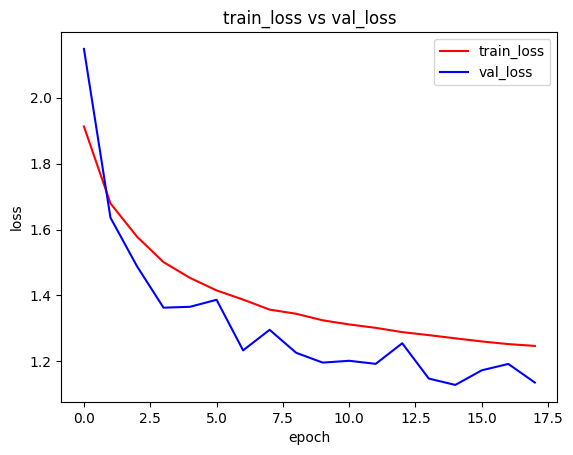

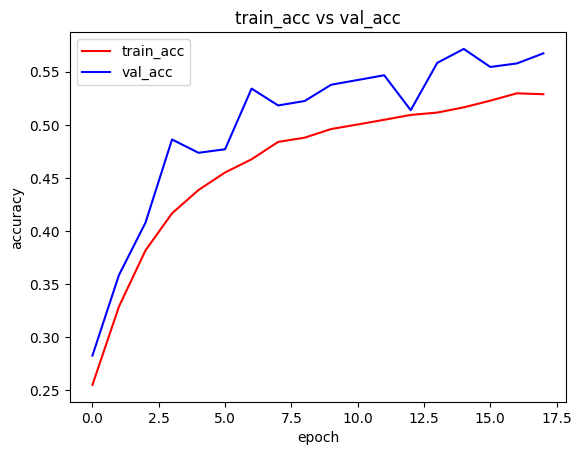

<Figure size 640x480 with 0 Axes>

In [ ]:
train_loss =hist.history['loss']
train_accuracy =hist.history['accuracy']
test_loss =hist.history['val_loss']
test_accuracy =hist.history['val_accuracy']

epochs = range(len(train_accuracy))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,test_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_accuracy,'r', label='train_acc')
plt.plot(epochs,test_accuracy,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()

In [ ]:
model.save("/content/drive/MyDrive/Saved models/facial emotion.h5")

In [ ]:
loss = model.evaluate(X_test/255.,y_test)

113/113 [==============================] - 0s 4ms/step - loss: 1.1286 - accuracy: 0.5715


In [ ]:
print('Test accuracy %1.2f%%'%(loss[1]*100))
print('Test loss %1.2f'%(loss[0]))

Test accuracy 57.15%
Test loss 1.13
